# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [59]:
# Q1 (code)
!pip install tomotopy
!pip install tomotopy
import tomotopy as tp # used for model modeling
import little_mallet_wrapper # used to transform all tweets to lowercase and remove stopwords, punctuation, and numbers
import seaborn # used to draw graphs
import pandas as pd # used for data manipulation and analysis
import re # used to remove URLS and user mentions
import matplotlib.pyplot as plt # used to draw plots

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [3]:
# Q2 (code)
df1= pd.read_csv("C:/Users/14359/Desktop/Assignment3-AD/sanders_tweets.csv")
df2= pd.read_csv("C:/Users/14359/Desktop/Assignment3-AD/trump_tweets.csv")
df= pd.concat([df1, df2], ignore_index=True) # concat () can be used to concatenate two datasets vertically and ignore_index=True represents a continuous index for the combined dataset. https://pandas.pydata.org/docs/reference/api/pandas.concat.html
df

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...
...,...,...,...,...
30366,@realDonaldTrump,1346912780700577792,@realDonaldTrump_1346912780700577792,I am asking for everyone at the U.S. Capitol ...
30367,@realDonaldTrump,1346928882595885058,@realDonaldTrump_1346928882595885058,https://t.co/Pm2PKV0Fp3
30368,@realDonaldTrump,1347334804052844550,@realDonaldTrump_1347334804052844550,https://t.co/csX07ZVWGe
30369,@realDonaldTrump,1347555316863553542,@realDonaldTrump_1347555316863553542,"The 75,000,000 great American Patriots who vo..."


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [4]:
# Q3 (code)
training_data=[]
original_texts=[]
titles=[]

# df.iterrows() can be used to iterate over DataFrame rows as (index, Series) pairs.https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html
for index, row in df.iterrows():
    processed_text=little_mallet_wrapper.process_string(row['Content'], numbers='remove')
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    training_data.append(processed_text)
    original_texts.append(row['Content'])
    titles.append(f"{row['Username']}_{row['TweetId']}")


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [11]:
# Q4 (code)
# We set topic number to 10
topic_num=10

# We set topic words number to 10
topic_words_num=10

# Intialize the model
model = tp.LDAModel(k=topic_num)

# Then we can split each tweet into words and put it into the model
for tweet in training_data:
    model.add_doc(tweet.strip().split())
    
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iteration_num = 10
for i in range(0, 10):
    model.train(iteration_num)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.592825526952295
Iteration: 1	Log-likelihood: -9.26657180696786
Iteration: 2	Log-likelihood: -9.073648207662488
Iteration: 3	Log-likelihood: -8.98096600360002
Iteration: 4	Log-likelihood: -8.929079041018861
Iteration: 5	Log-likelihood: -8.89835822027812
Iteration: 6	Log-likelihood: -8.873863949585534
Iteration: 7	Log-likelihood: -8.855054736722716
Iteration: 8	Log-likelihood: -8.838211521583798
Iteration: 9	Log-likelihood: -8.82555018718075


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [60]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

for topic_number in range(0, topic_num):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=topic_words_num))
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

news fake media people never would even biden like joe

✨Topic 1✨

jobs economy america great ever american years president energy best

✨Topic 2✨

democrats senate border people republicans vote president want must trump

✨Topic 3✨

tax people workers americans million trump pay working billion need

✨Topic 4✨

trump president fbi russia collusion witch hunt mueller schiff obama

✨Topic 5✨

states united china must people war world trade deal country

✨Topic 6✨

great state military total job strong endorsement thank law complete

✨Topic 7✨

great thank trump big maga state see america florida night

✨Topic 8✨

president great whitehouse today thank house honor white trump national

✨Topic 9✨

people care health must right every american country americans america



#### Q5b (words)
##### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?
Topic 0 seems to be related to the skepticism towards media, with words "news", "fake", "media", and "people".The mention of "Biden" and "Joe" suggests a political context.  

Topic 1 seems to be related to job, economy and energy issues. Words "great" and "best" reflect positive sentiments about economic growth and prosperity.

Topic 2 seems to be related to political issues. It may refer to debates and conflicts between political parties, particularly regarding issues like immigration and voting rights.

Topic 3 seems to be related to taxation, workers' rights and economic issues.

Topic 4 may involve state secrets and political scandals surrounding President Trump, particularly regarding the FBI, Russia, collusion, and investigations. 

Topic 5 may involve the trade war between the US and China.

Topic 6 may involve military affairs and discussions about law and order.

Topic 7 may involve Trump's catchword "Make America Great Again", indicating Trump's mobilization efforts. 

Topic 8 may involve the presidency and government. It might involve discussions about presidential actions, White House events, and national honors. 

Topic 9 may focus on healthcare policies, individual rights, and the well-being of the American population.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [12]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5178947210311888 
Per Topic: [0.4768665641546249, 0.6198734819889069, 0.5330876752734184, 0.636423534154892, 0.3978909060359001, 0.5287993401288986, 0.4228276997804642, 0.4592589274048805, 0.4438950106501579, 0.6600240707397461]



In [7]:
# Change the topic number to 5

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k)for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()


==== Coherence : c_v ====
Average: 0.5116578099131583 
Per Topic: [0.6503520727157592, 0.48050897419452665, 0.4599206537008286, 0.40034986585378646, 0.5671574831008911]



In [14]:
# Change the topic number to 15

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k)for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5635849994917711 
Per Topic: [0.5930997028946876, 0.7054067939519882, 0.6139789909124375, 0.5231739431619644, 0.5096707075834275, 0.6403444677591323, 0.3687115743756294, 0.5344242230057716, 0.6208834625780583, 0.6396045088768005, 0.4637628301978111, 0.5457949638366699, 0.6277160674333573, 0.5428178966045379, 0.5243848592042923]



In [9]:
# Change the topic number to 20

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k)for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5829662978649137 
Per Topic: [0.5919500201940536, 0.6303445130586625, 0.5177187740802764, 0.6207755297422409, 0.6279376477003098, 0.6181780129671097, 0.6091077625751495, 0.5320227429270744, 0.5671403922140599, 0.5555849283933639, 0.510375925898552, 0.4348091959953308, 0.5520115867257118, 0.5210928022861481, 0.6309037923812866, 0.7330972373485565, 0.5847011208534241, 0.5461666040122509, 0.7517438203096389, 0.5236635476350784]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

#### Q6 (words)
A higher average coherence score suggests that the top topic words within each topic are more closely related or representative of a specific topic. 
1. When we initially set topic number to 10, we could get an average coherence score and 10 coherence scores for 10 topics. The average coherence score (around 0.5178) indicates the topics in the model exhibit a moderate level of coherence. Also, among 10 topics, Topic 9 has the highest coherence score (around 0.6600), which suggests that its top words are most representative of a specific topic. Topic 4, however,with the lowest coherence score (around 0.3978), suggests that its top words may not accurately represent a specific topic compared to other topics in the model. 
2. When we adjust topic number to 5, 15 or 20, the average coherence score and coherence scores for different topics all change, which suggests that changing the number of topics will affect the coherence of the model.Furthermore, the average coherence score appears to generally increase with the rise in the number of topics. However, according to the plot below (X1. Optional question 1), we can know that at a certain point, this trend ceases, and the average coherence score becomes more stable.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

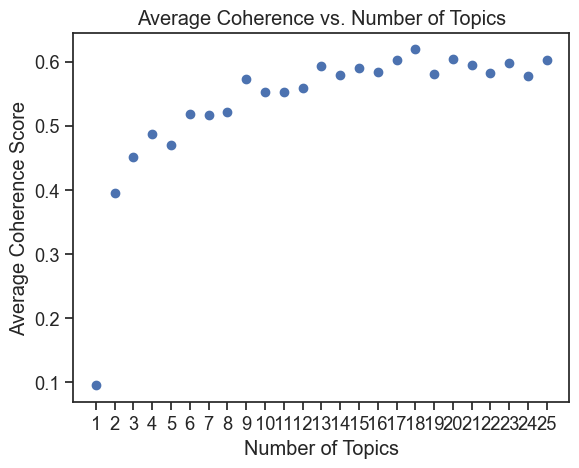

In [72]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
# In this function, we can set start_num and end_num, and this function will plot all the average coherence scores of topics whose number is between start_num and end_num 
def plot_coherence(start_num, end_num, training_data):
    average_coherence_list = []
    topics_num_list = range(start_num, end_num+1)
    
    for topic_num in topics_num_list:
        model = tp.LDAModel(k=topic_num)
        
        for tweet in training_data:
            model.add_doc(tweet.strip().split())
        
        iteration_num = 10
        for i in range(0, 10):
            model.train(iteration_num)
        
        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence_list.append(coh.get_score())
    
    plt.scatter(topics_num_list, average_coherence_list)
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score')
    plt.xticks(topics_num_list)  # Ensure integer ticks on x-axis (https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/)
    plt.show()

# Take a test 
plot_coherence(1,25, training_data)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [22]:
# Q7a (code)
topic_distributions = [list(tweet.get_topic_dist()) for tweet in model.docs]

from IPython.display import Markdown, display

topics=[]
topic_individual_words = []
for topic_number in range(0, topic_num):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=topic_words_num))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    
def markdown(string):
    display(Markdown(str(string)))

def top_docs(titles, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(distribution[topic_index], document)
                          for distribution, document
                          in zip(topic_distributions, titles)], reverse=True)

    topic_words = topics[topic_index]

    markdown(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for prob, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        markdown(f'✨  \n**Topic Probability**: {prob}  \n**Document**: {doc}\n\n')

    return



In [63]:
# Display 3 documents for topic 9
top_docs(df['Title'], topic_distributions, topic_index=9, n=3)

### ✨Topic 9✨

workers pay billion wage must paid million jobs street time



---


✨  
**Topic Probability**: 0.9462363123893738  
**Document**: SenSanders_1351670845639421952



✨  
**Topic Probability**: 0.9444916844367981  
**Document**: SenSanders_1330993926443036672



✨  
**Topic Probability**: 0.9426299929618835  
**Document**: SenSanders_1221233701297754112



In [50]:
# Display 3 documents for topic 12
top_docs(df['Title'], topic_distributions, topic_index=12, n=3)

### ✨Topic 12✨

people health care americans tax must right need country working



---


✨  
**Topic Probability**: 0.9357423782348633  
**Document**: SenSanders_1238638606257971200



✨  
**Topic Probability**: 0.9331530332565308  
**Document**: SenSanders_1135934570443001856



✨  
**Topic Probability**: 0.9331530332565308  
**Document**: SenSanders_1041811332746694656



In [48]:
# Display 3 documents for topic 10
top_docs(df['Title'], topic_distributions, topic_index=10, n=3)

### ✨Topic 10✨

people together country american new america help lives stand great



---


✨  
**Topic Probability**: 0.8958621621131897  
**Document**: @realDonaldTrump_1106272915488686080



✨  
**Topic Probability**: 0.8871170282363892  
**Document**: @realDonaldTrump_988859727219187713



✨  
**Topic Probability**: 0.8860406279563904  
**Document**: @realDonaldTrump_903980484966752257



In [52]:
# Display 3 documents for topic 13
top_docs(df['Title'], topic_distributions, topic_index=13, n=3)

### ✨Topic 13✨

jobs economy record ever drug year american best unemployment new



---


✨  
**Topic Probability**: 0.9277578592300415  
**Document**: @realDonaldTrump_1105671877798825989



✨  
**Topic Probability**: 0.924591600894928  
**Document**: @realDonaldTrump_1163809817208733701



✨  
**Topic Probability**: 0.9055901765823364  
**Document**: @realDonaldTrump_1163603361423351808



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

#### Q7b (words)
There are topics with top tweets exclusively from one politician. In Topic 9 and 12, all top 3 tweets are from Bernie Sanders (@SenSanders), while in Topic 10 and 13, all top 3 tweets are from Donald Trump (@realDonaldTrump).

Topic 9 and 12 revolve around issues such as taxes, workers, healthcare and wages, which align closely with Bernie Sanders' left-wing views. Left-wing populism values economic equality, the wealth redistribution, the expansion of social services, and empowering the working class against the capitalist elite. Therefore, Topic 9 and 12 are representative of Bernie Sanders'view.

On the other hand, Topic 10 and 13 focus on American people, employment and drugs, which resonates with Donald Trump's right-wing stance. Right-wing populism often emphasizes nationalism, national interests and economic conservatism while also addressing societal issues, particularly employment. During his presidency, Trump notably emphasized job creation and economic growth. Therefore, these topics reflect Trump's views.


## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [53]:
# Crete a sample of tweets

from random import sample
import seaborn as sns
target_labels = sample(titles,100)

In [83]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
sns.set(style='ticks', font_scale=1.2)
def topics_heatmap(titles,
                    topic_distributions,
                    individual_words,
                    output_path=None,
                    target_labels=None,
                    color_map = sns.cm.rocket_r,
                    dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    plot_dict = []
    for title, distribution in zip(titles, topic_distributions):
        if not target_labels or title in target_labels:
            for topic_index, prob in enumerate(distribution):
                plot_dict.append({'Probability': float(prob),
                                      'Tweet': title,
                                      'Topic': 'Topic ' + str(topic_index).zfill(2) + ': ' + ' '.join(individual_words[topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_plot = pd.DataFrame(plot_dict)
    df_wide = df_plot.pivot_table(index='Tweet',
                                  columns='Topic',
                                  values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()
    


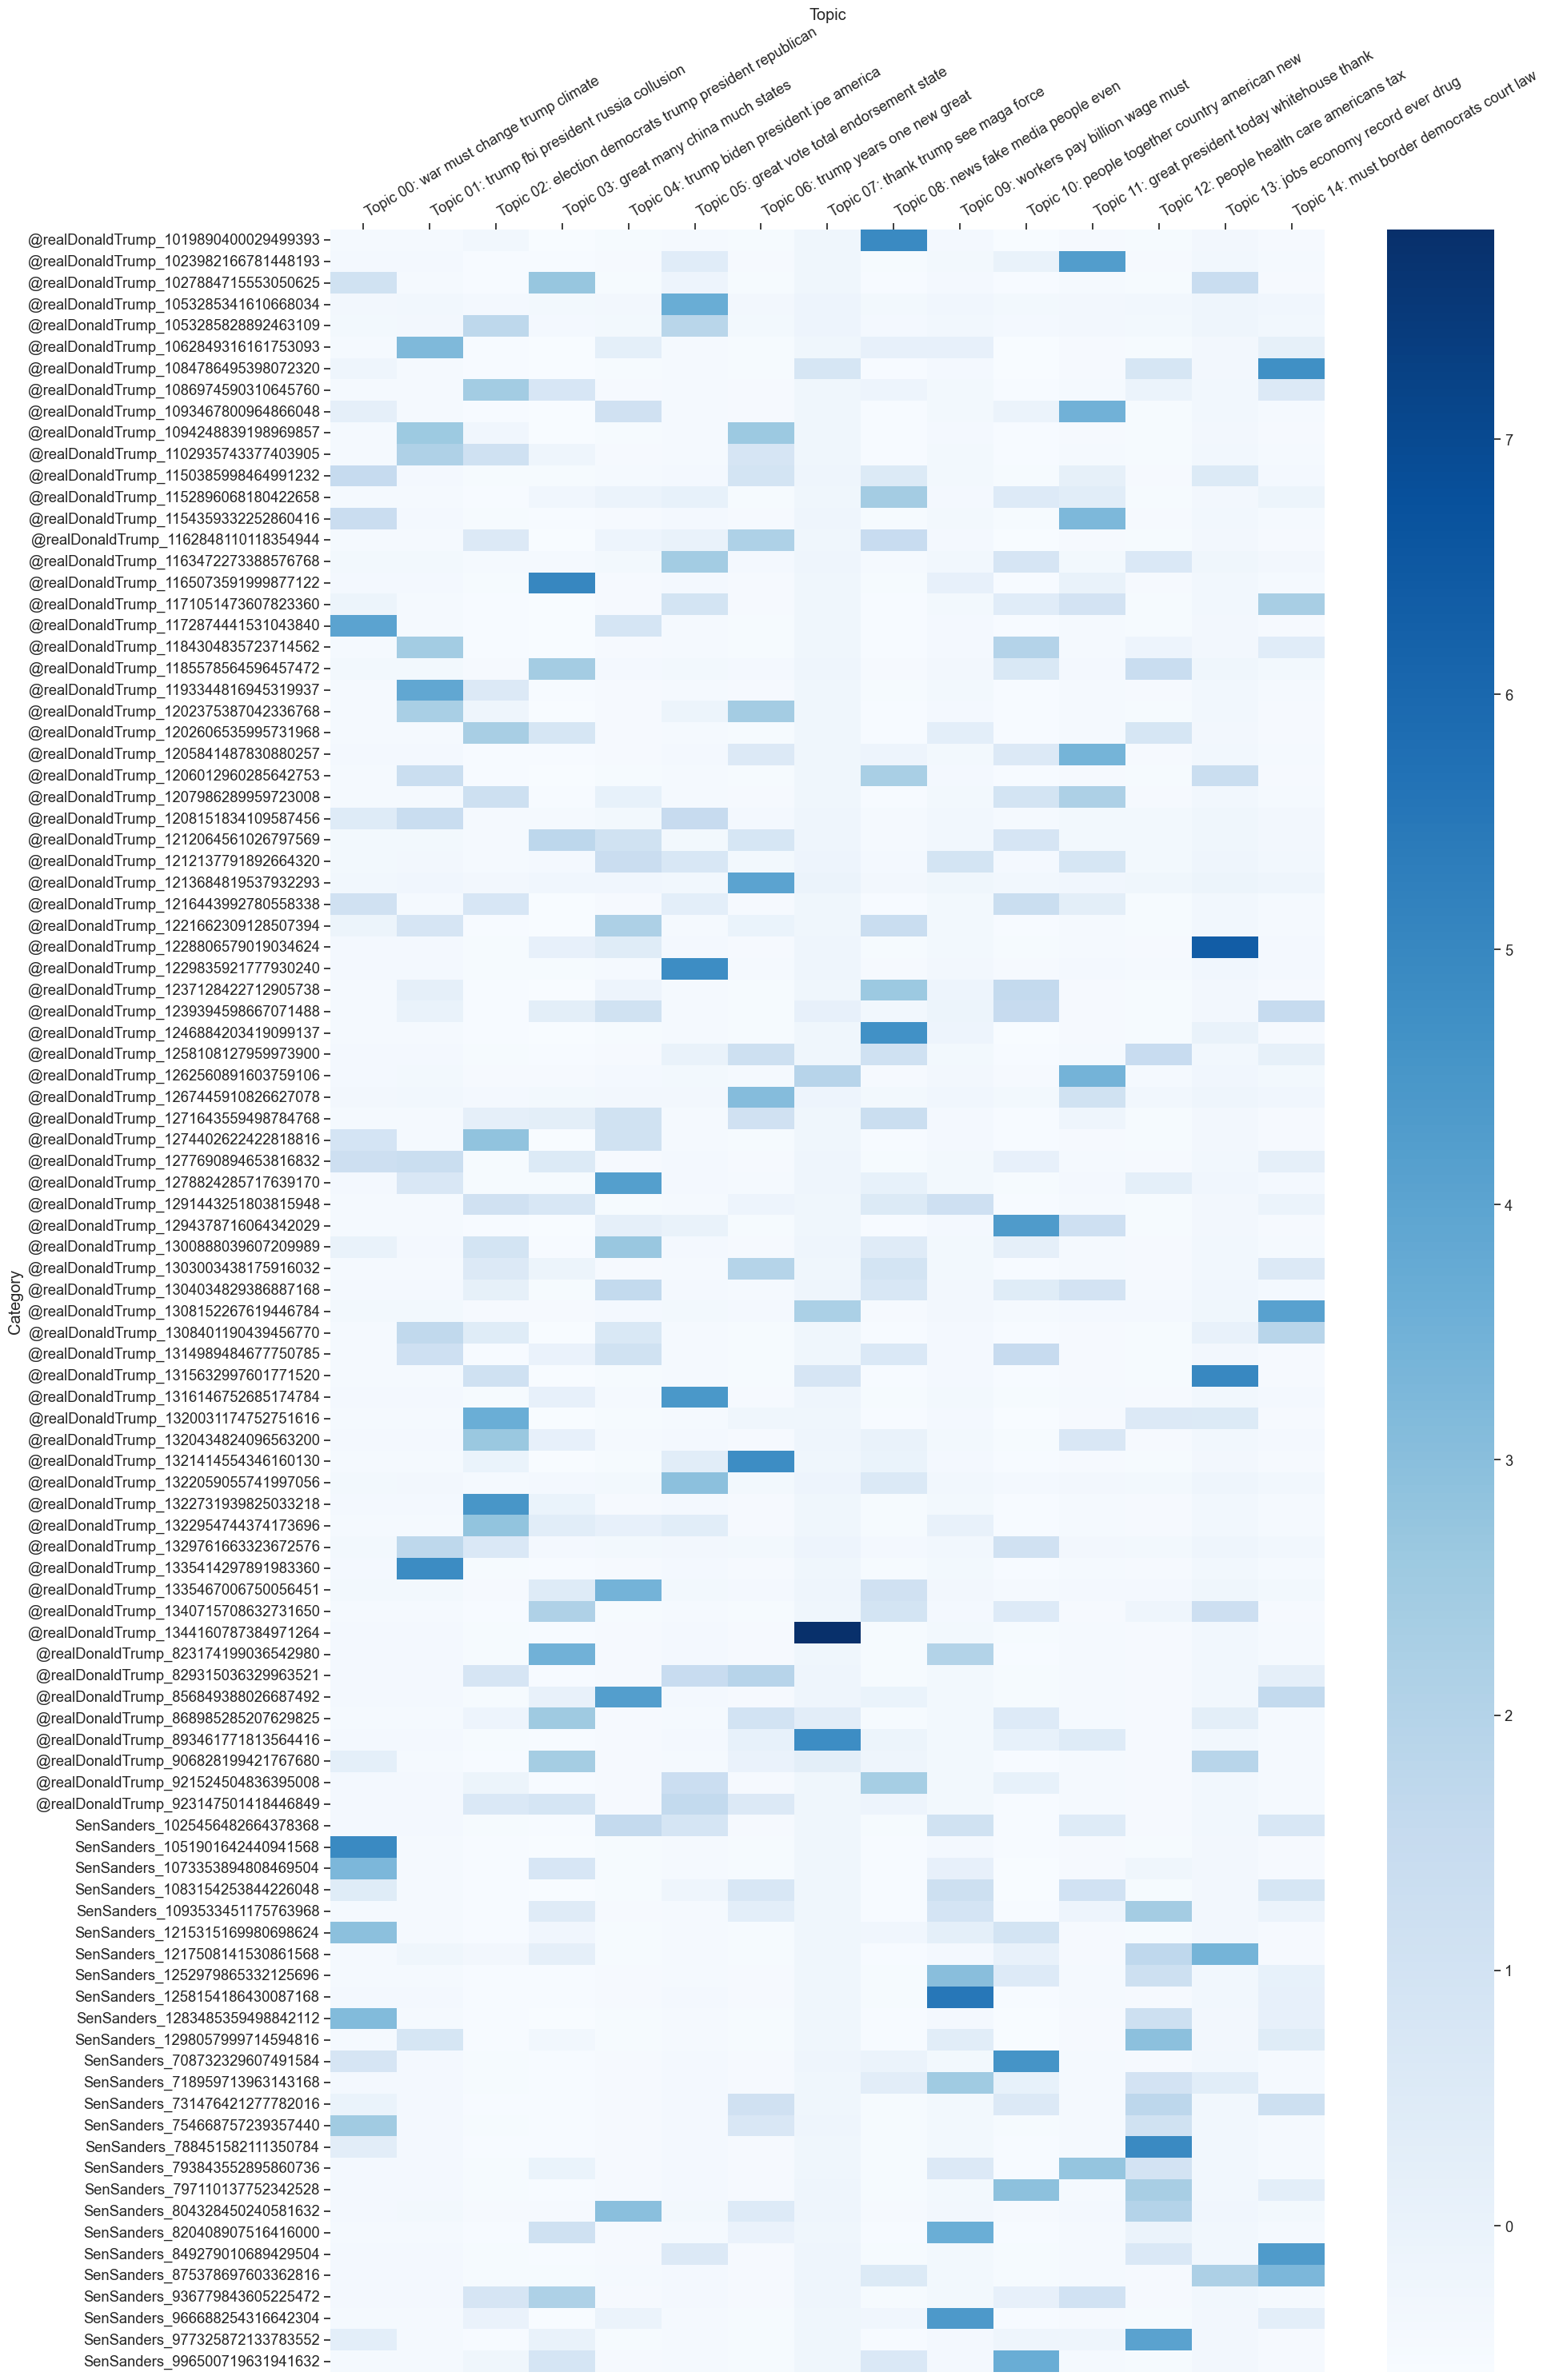

In [58]:
topics_heatmap(titles,
               topic_distributions,
                topic_individual_words,
                target_labels=target_labels,
                color_map = 'Blues',
                dim=(20,30))


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

#### Q9 (words)
Topic 1, 2, 3, 4, 5, 6, 8 and 11 are more frequently referred in Donald Trump's tweets. These topics are related to collusion with Russia, relations with China, and the presidential campaign against Joe Biden. These topics align with Trump's overall political narrative.

Topic 0, 9, 10 and 12 are more frequently discussed in Bernie Sanders'tweets.These topics focus on wars, climate change, workers' income, healthcare and tax. These topics align with Sanders' political agenda and advocacy for progressive policies.  

Based on these probability distributions, it seems that Trump's tweets cover a broader range of topics compared to Sanders, as evidenced by the relatively even probability distribution across all topics in Trump's tweets. In contrast, Sanders' tweets exhibit a more focused approach, with Topic 1, 2, 5, 6, 7, and 8 showing notably lower probabilities.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [73]:
# X2 (code)
# First, we can define a function to separate tweets.
def separate_tweets(titles, username):
    tweets_list=[]
    for title in titles:
        if title.startswith(username):
            tweets_list.append(title)
    return tweets_list

# Then we divide all tweets into two lists and get 50 tweets by Trump and 50 by Sanders
tweets_list_Sanders=separate_tweets(titles, 'SenSanders')
tweets_list_Trump=separate_tweets(titles, '@realDonaldTrump')

target_labels_balanced=sample(tweets_list_Sanders,50)+sample(tweets_list_Trump,50)
target_labels_balanced

['SenSanders_955589263030210560',
 'SenSanders_1247538961121071104',
 'SenSanders_843085329380921344',
 'SenSanders_1133530020419387392',
 'SenSanders_943172903826321408',
 'SenSanders_769268935799767040',
 'SenSanders_1175174043252723712',
 'SenSanders_1011320334946103296',
 'SenSanders_961710796412739584',
 'SenSanders_703259273636220928',
 'SenSanders_734160390318370816',
 'SenSanders_744304189048758272',
 'SenSanders_759813645803151360',
 'SenSanders_1021824587728793600',
 'SenSanders_1284971058815172608',
 'SenSanders_771054700925968384',
 'SenSanders_710149593380552704',
 'SenSanders_752978631148830720',
 'SenSanders_730491678813982720',
 'SenSanders_730094330686414848',
 'SenSanders_1245114976072859648',
 'SenSanders_800083209820262400',
 'SenSanders_1123324774531383296',
 'SenSanders_798609512949116928',
 'SenSanders_1237465322623504384',
 'SenSanders_1004717425894584320',
 'SenSanders_1010187269741924352',
 'SenSanders_745016130910171136',
 'SenSanders_683111978085302272',
 'S

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [81]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)
plot_dict = []
for title, distribution in zip(titles, topic_distributions):
    if not target_labels or title in titles:
        for topic_index, prob in enumerate(distribution):
            plot_dict.append({'Probability': float(prob),
                                'Tweet': title,
                                'Topic': 'Topic ' + str(topic_index).zfill(2) + ': ' + ' '.join(topic_individual_words[topic_index][:4])})

                
df_plot = pd.DataFrame(plot_dict)
df_wide = df_plot.pivot_table(index='Tweet',
                                columns='Topic',
                                values='Probability')
df_norm_col=(df_wide-df_wide.mean())/df_wide.std()
df_norm_col

Topic,Topic 00: war must change trump,Topic 01: trump fbi president russia,Topic 02: election democrats trump president,Topic 03: great many china much,Topic 04: trump biden president joe,Topic 05: great vote total endorsement,Topic 06: trump years one new,Topic 07: thank trump see maga,Topic 08: news fake media people,Topic 09: workers pay billion wage,Topic 10: people together country american,Topic 11: great president today whitehouse,Topic 12: people health care americans,Topic 13: jobs economy record ever,Topic 14: must border democrats court
Tweet,,,,,,,,,,,,,,,
@realDonaldTrump_1000061992042975232,-0.010635,-0.452994,-0.509337,-0.545805,-0.418372,-0.382390,-0.032235,0.475538,-0.491156,-0.401048,2.137457,1.081494,0.554530,-0.390302,-0.497554
@realDonaldTrump_1000064605903876096,-0.394613,-0.462419,-0.051622,0.337176,-0.430347,-0.390397,-0.469595,-0.347710,-0.503376,-0.410097,2.515238,-0.439989,-0.315223,-0.399855,2.009922
@realDonaldTrump_1000114139136606209,-0.390645,-0.458437,-0.516746,3.850147,-0.425287,-0.387013,-0.464011,-0.344336,1.362127,-0.406273,-0.477089,-0.436027,-0.502770,-0.395819,-0.505106
@realDonaldTrump_1000138164923781121,0.134930,-0.463253,0.159611,0.957903,0.855261,-0.391105,-0.470765,-0.348417,-0.504457,-0.410897,-0.483613,-0.226720,0.793523,0.389671,-0.024037
@realDonaldTrump_1000145873274359809,-0.364957,-0.432655,-0.481647,2.389515,-0.392529,-0.365110,-0.427861,-0.322489,0.528395,-0.381520,-0.442163,-0.410380,-0.472434,0.805564,0.618570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SenSanders_999363693623349248,1.285999,-0.436399,0.460184,0.833572,-0.397286,-0.368290,-0.433110,-0.325661,-0.469638,-0.385114,-0.447234,-0.414104,1.070558,-0.373481,0.032711
SenSanders_999681965526798336,-0.389453,-0.457241,-0.232442,-0.552238,-0.423767,-0.385997,-0.462334,-0.343322,0.609227,4.646160,-0.475468,-0.434837,-0.501362,-0.394606,-0.503447
SenSanders_999681967720460288,-0.385222,-0.452994,-0.509337,-0.545805,-0.418372,-0.382390,-0.456380,-0.339724,-0.491156,-0.401048,-0.469716,-0.430613,3.444492,-0.390302,1.224866


Based on the 'df_norm_col' dataframe, we can utilize the sort_values() function to sort each column (topic). The tweets at the top have the highest probability of being associated with this topic. Furthermore, by comparing various values across different columns, we can infer which topic a certain tweet is most likely related to.